In [139]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

Text(0,0.5,'Social Media Shares')

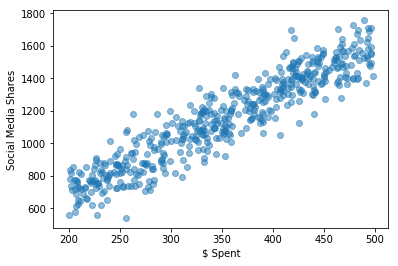

In [140]:
θ = 3
bias = 100
X = np.array([np.random.uniform(200,500) for i in range(500)])
ε = np.array([np.random.normal(0,100) for i in range(500)])
y = X * θ + bias + ε
plt.scatter(X, y, alpha=0.5)
plt.xlabel("$ Spent")
plt.ylabel("Social Media Shares")

In [141]:
θ = 3
bias = 100
X = np.array([np.random.uniform(100,110) for i in range(500)])
ε = np.array([np.random.normal(0,1) for i in range(500)])
y = np.sin(X) * θ + bias + ε
plt.scatter(X, y, alpha=0.5)
plt.xlabel("$ Spent")
plt.ylabel("Social Media Shares")

Text(0.5,1,'sin(x), with 100 samples and noise')

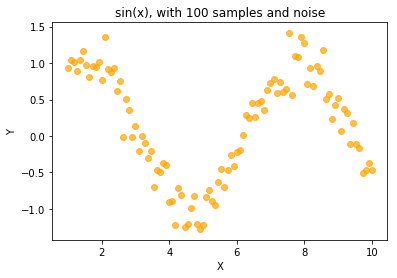

In [144]:
X_sin = np.linspace(1,10,100)
y_sin = np.sin(X_sin) + np.array([np.random.normal(0,0.2) for i in range(100)])
plt.scatter(X_sin, y_sin, alpha= 0.7, c="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("sin(x), with 100 samples and noise")

In [146]:
class Kernel:
    
    condition = 1e-3 # add extra condition to reduce singular value issue
    
    @staticmethod
    def convert_to_float(num):
        return_val = np.float(num) if np.isscalar(num) else num
        return return_val
    
    @staticmethod
    def get(x_1, x_2, condition=1e-3): 
        K = rbf_kernel(x_1, x_2) # use sklearn's rbf_kernel()
        if type(x_1) == list:
            condition_matrix = condition * np.eye(K.shape[0]) if K.shape[0] == K.shape[1] else np.eye(K.shape[1])     
        else:
            condition_matrix = condition
        return (K + condition_matrix)

In [147]:
def exponential_cov(x, y):
    return np.exp( -0.5 * np.subtract.outer(x, y)**2)

In [151]:
x = np.array([0,1,2,2])
exponential_cov(x, x)

array([[ 1.        ,  0.60653066,  0.13533528,  0.13533528],
       [ 0.60653066,  1.        ,  0.60653066,  0.60653066],
       [ 0.13533528,  0.60653066,  1.        ,  1.        ],
       [ 0.13533528,  0.60653066,  1.        ,  1.        ]])

In [152]:
def conditional(x_new, x, y):
    B = exponential_cov(x_new, x)
    C = exponential_cov(x, x)
    A = exponential_cov(x_new, x_new)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())


In [158]:
x_new = np.array([1])
x = np.array([2,3,4,5,6,8])

<Container object of 3 artists>

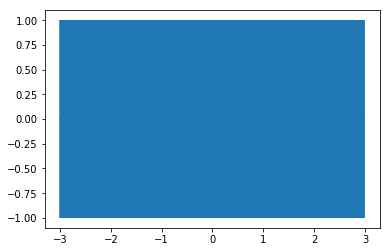

In [159]:
θ = [1, 10]
σ_0 = exponential_cov(0, 0)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)

In [160]:
σ_1 = exponential_cov(x, x)
print(f"σ_1 is {σ_1}")
def predict(x, data, kernel, sigma, t):
    k = [kernel(x, y) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, σ_1, y) for i in x_pred]

σ_1 is [[  1.00000000e+00   6.06530660e-01   1.35335283e-01   1.11089965e-02
    3.35462628e-04   1.52299797e-08]
 [  6.06530660e-01   1.00000000e+00   6.06530660e-01   1.35335283e-01
    1.11089965e-02   3.72665317e-06]
 [  1.35335283e-01   6.06530660e-01   1.00000000e+00   6.06530660e-01
    1.35335283e-01   3.35462628e-04]
 [  1.11089965e-02   1.35335283e-01   6.06530660e-01   1.00000000e+00
    6.06530660e-01   1.11089965e-02]
 [  3.35462628e-04   1.11089965e-02   1.35335283e-01   6.06530660e-01
    1.00000000e+00   1.35335283e-01]
 [  1.52299797e-08   3.72665317e-06   3.35462628e-04   1.11089965e-02
    1.35335283e-01   1.00000000e+00]]


ValueError: shapes (6,) and (500,) not aligned: 6 (dim 0) != 500 (dim 0)

In [ ]:
def new_predict(x_new):
    k_x_new_x = [Kernel.get(x_new, x_i) for x_i in X]
    k_x_x = Kernel.get(X,X) # covariance matrix for existing training points
    k_x_new_x_new = Kernel.get(x_new, x_new) # covariance matrix for new test points
    y_pred = np.dot(k_x_new_x, np.linalg.inv(k_x_x)).dot(y) # Equation 2.23
    updated_sigma = k_x_new_x_new - np.dot(k_x_new_x, np.linalg.inv(k_x_x)).dot(k_x_new_x) # Equation 2.24
    return y_pred.squeeze(), updated_sigma.squeeze() 

In [ ]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

In [ ]:
x_pred = np.linspace(-1,5,100)
predictions = [new_predict(i) for i in x_pred]
# these next few lines are entirely from Chris Fonnesbeck's blog post at Domino Data Lab!
y_pred, sigmas = np.transpose(predictions) 
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=1)
plt.plot(X, y, "ro")
plt.title("GP Predictions Given Single Training Point (2.3, 0.922)")

In [170]:
class GaussianProcess:
    
    def __init__(self, X, y, condition=1e-5):
        self.X = X
        self.y = y
        # precompute the covariance matrix and invert it
        self.k_x_x = Kernel.get(self.X,self.X, condition)
        self.inv_k_x_x = np.linalg.inv(self.k_x_x)

    def update(self, x, y, condition=1e-2):
        
        """
        x: new datapoint to incorporate
        y: corresponding output value(s) to incorporate
        condition: the σ^2(Ι) portion of the kernel, by default set to a small amount
        """
        
        self.X = np.concatenate((self.X,x), axis=0)
        self.y = np.concatenate((self.y,y), axis=0)
        
        # update the covariance matrix for existing training points
        self.k_x_x = Kernel.get(self.X,self.X, condition)
        self.inv_k_x_x = np.linalg.inv(self.k_x_x)
    
    def new_predict(self, x_new, noise=1e1):
        k_x_new_x = np.array([Kernel.get(x_new, np.array([x_i])).reshape(-1) for x_i in self.X])
        print(k_x_new_x.shape)
        k_x_new_x_new = Kernel.get(x_new, x_new, noise) # covariance matrix for new test points
        print(k_x_new_x_new.shape)
        y_pred = np.dot(k_x_new_x.T, self.inv_k_x_x).dot(self.y) # Equation 2.23
        updated_sigma = k_x_new_x_new - np.dot(
            k_x_new_x.T, self.inv_k_x_x).dot(k_x_new_x) # Equation 2.24
        return y_pred.squeeze(), updated_sigma.squeeze() # using Fonnesbeck code here!
    
    def generate_predictions(self, prediction_interval, noise=1e1):
        predictions = [self.new_predict(np.array([[i]]), noise) for i in prediction_interval]
        # these next few lines are entirely from Chris Fonnesbeck's blog post at Domino Data Lab!
        y_pred, sigmas = np.transpose(predictions) 
        plt.errorbar(prediction_interval, y_pred, yerr=sigmas, capsize=1)
        plt.plot(self.X, self.y, "ro")
        plt.title(f"GP Predictions Given {len(self.y)} Training Points (In Red)")

In [116]:
np.random.shuffle(X_sin)

(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1, 1)
(21, 1)
(1

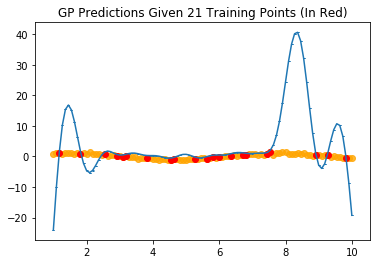

In [171]:
prediction_interval = np.linspace(1,10,100)
start = int(np.random.uniform(1,100))
gp = GaussianProcess([[X_sin[start]]], [[y_sin[start]]])
indices = range(len(prediction_interval))

visited = []
for i in range(20):
    
    start = np.random.choice(indices, replace=True)
    if start in visited:
        start = np.random.choice(indices, replace=True)
        visited.append(start)
    else:
        visited.append(start)
    gp.update([[X_sin[start]]], [[y_sin[start]]])
    
gp.generate_predictions(prediction_interval, noise=1e-2)
plt.scatter(X_sin, y_sin, c="orange", alpha=0.8)

In [138]:
from sklearn.kernel_approximation import Nystroem
n = Nystroem(n_components=5)
new = n.fit_transform(gp.k_x_x)
new = new[:5,:]
np.linalg.inv(new)

array([[ -0.43235703,  -0.33455649,   2.46853747,  -3.76638218,
          2.51411795],
       [ -2.44014889,   3.0105118 ,  60.38178773, -71.56365088,
          9.68495169],
       [ -0.49305242,  -0.3869463 ,   2.79855727,  -1.02736893,
         -0.38819181],
       [  2.83901637,  -1.47117048, -84.69925553,  99.83263032, -14.1010609 ],
       [  1.30531897,  -0.19041528,  12.40002468, -15.04033775,
          1.73140423]])

In [169]:
data = np.array([[2], [3], [5], [9], [6], [10]])
n.fit_transform(data.T)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/kernel_approximation.py:470: UserWarning: n_components > n_samples. This is not possible.
n_components was set to n_samples, which results in inefficient evaluation of the full kernel.
  warnings.warn("n_components > n_samples. This is not possible.\n"


array([[ 1.]])

In [ ]:
distances = []
γ = -.5
for i in x:
    for j in x:
        distances.append(np.exp(γ * np.linalg.norm(i - j) ** 2))
np.array(distances).reshape(len(x),len(x))